### Gabriel Ábrahám
### Ákos Lévárdy
### Percentage of work: 50%/50%
### Dataset: 81

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import scipy
import scipy.stats as stats

## Analysis of data structure
### Importing the dataset.. Reading the .csv files

- We have 3 .csv files which are seperated with tabulators.
- The files provide information about users, their shopping sessions and about the shop they've visited.



In [4]:
productData = pd.read_csv("dataset/product.csv",sep="\t")

In [5]:
print(f"Number of records: {productData.shape[0]}\nNumber of attributes: {productData.shape[1]}")

Number of records: 14975
Number of attributes: 4


In [6]:
productData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14975 entries, 0 to 14974
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location     14975 non-null  object
 1   product_ean  14975 non-null  int64 
 2   code         14960 non-null  object
 3   store_name   14975 non-null  object
dtypes: int64(1), object(3)
memory usage: 468.1+ KB


In [7]:
userData = pd.read_csv("dataset/user.csv",sep="\t")

In [8]:
print(f"Number of records: {userData.shape[0]}\nNumber of attributes: {userData.shape[1]}")

Number of records: 2525
Number of attributes: 11


In [9]:
userData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sex               1263 non-null   object
 1   residence         884 non-null    object
 2   username          2525 non-null   object
 3   user_id           2525 non-null   int64 
 4   address           2146 non-null   object
 5   current_location  2399 non-null   object
 6   registration      2525 non-null   object
 7   race              757 non-null    object
 8   name              2525 non-null   object
 9   birthdate         1389 non-null   object
 10  mail              2525 non-null   object
dtypes: int64(1), object(10)
memory usage: 217.1+ KB


In [10]:
sessionData = pd.read_csv("dataset/session.csv",sep="\t")

In [11]:
print(f"Number of records: {sessionData.shape[0]}\nNumber of attributes: {sessionData.shape[1]}")

Number of records: 11107
Number of attributes: 25


 - In the info we see that sessionData has string object columns. That's a problem in the data so we need to convert it to something reasonable

In [12]:
sessionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_click_product_info          11096 non-null  float64
 1   user_id                         11107 non-null  int64  
 2   screen_height                   11107 non-null  object 
 3   pct_scroll_move_duration        11096 non-null  float64
 4   scroll_move_total_rel_distance  11096 non-null  float64
 5   pct_click                       11096 non-null  float64
 6   pct_scrandom                    11095 non-null  float64
 7   pct_wild_mouse                  11096 non-null  float64
 8   session_id                      11107 non-null  int64  
 9   browser_name                    11107 non-null  object 
 10  pct_input                       11096 non-null  float64
 11  screen_width                    11107 non-null  object 
 12  mouse_move_total_rel_distance   

## User Data

- Unifying dates in registration column and setting it as the DataFrame index

In [13]:
userData["registration"] = userData["registration"].apply(lambda x: pd.to_datetime(x).strftime("%Y-%m-%d"))

In [14]:
userData = userData.sort_values(by="registration")
userData.set_index("registration", inplace=True)

In [15]:
userData.head(10)

,sex,residence,username,user_id,address,current_location,race,name,birthdate,mail
registration,,,,,,,,,,
2013-09-22,F,NaN,zmarek,1807,V Nížinách 6\r\n276 31 Sedlec-Prčice,"(Decimal('58.3427835'), Decimal('101.334050'))",NaN,Irena Sedláčková,1931-09-14,dana76@chello.cz
2013-09-24,F,NaN,yamadaryohei,1074,京都府白井市太田ヶ谷34丁目2番5号,"(Decimal('-50.456706'), Decimal('-172.520074'))",NaN,伊藤 結衣,1969-05-02,pkato@yahoo.com
2013-09-25,F,NaN,milenacerna,1294,Rokytnická 4\r\n169 35 Přelouč,"(Decimal('3.1728475'), Decimal('97.911387'))",NaN,Denisa Vávrová,1914-09-09,nikola83@volny.cz
2013-09-26,M,NaN,ruzickatomas,1686,NaN,"(Decimal('48.0218595'), Decimal('-68.727505'))",NaN,Patrik Malý,1962-01-31,jindrich05@email.cz
2013-09-30,F,長野県葛飾区中小来川24丁目8番6号 コート北上野572,taichi54,964,東京都横浜市金沢区松石21丁目18番7号,"(Decimal('-15.5416345'), Decimal('123.791853'))",NaN,前田 真綾,NaN,sayuri12@hotmail.com
2013-10-09,NaN,福島県西多摩郡檜原村芝大門7丁目22番6号 丹勢シティ500,yasuhiro03,503,鹿児島県横浜市緑区吾妻橋38丁目9番18号 コーポ元浅草783,"(Decimal('27.9412735'), Decimal('-156.530493'))",NaN,松本 康弘,NaN,cnakamura@gmail.com
2013-10-10,NaN,Stefan-Siering-Gasse 08\r\n72596 Düren,niemeiergretl,481,Patric-Heidrich-Straße 2/2\r\n82727 Gotha,"(Decimal('-36.4387955'), Decimal('56.052913'))",NaN,Wieland Schleich,1971-07-11,matoroehrdanz@gmail.com
2013-10-11,F,NaN,yutakato,1694,高知県武蔵村山市虎ノ門虎ノ門ヒルズ森タワー9丁目19番14号 クレスト東三島446,"(Decimal('-30.6729475'), Decimal('150.053937'))",NaN,松本 くみ子,1945-09-22,takahashirei@gmail.com
2013-10-13,NaN,NaN,jpokorna,916,Mádrova 6\r\n219 39 Miletín,"(Decimal('89.3748045'), Decimal('-134.609984'))",NaN,Milan Svoboda,1967-12-21,vavrovaradka@gmail.com


- Checking if the email addresses have correct format

In [16]:
import re

# ([^\s]+)@  any character except a whitespace at least once for the username followed by @
# ([^\s]+)\. any character except a whitespace at least once for the domain name(until the dot) followed by a dot
# ([^\s]){2,3} any character except a whitespace 2-3 times to finish the domain name
check = [address for address in userData.mail if not re.match("^([^\s]+)@([^\s]+)\.([^\s]){2,3}$", address)]
# empty list means all the addresses are correct
check

[]

- Setting NaNs in race column to "unspecified" cause the column already contains those

In [17]:
uniques = list(userData.race.unique())
for i in uniques:
    if type(i) == float:
        uniques.remove(i)
        break
userData.race = ["unspecified" if race not in uniques else race for race in userData.race]

- Number of NaNs in each column
- A large part of the DataFrame consists of rows that contain at least one NaN so for now we wont drop them

In [18]:
for column in userData.columns:
    if (nans := userData[column].isna().sum()) > 0:
        print(f"{column}: {nans}")

sex: 1262
residence: 1641
address: 379
current_location: 126
birthdate: 1136


In [19]:
print(f"Number of duplicate records: {userData[userData.duplicated].shape[0]}")

Number of duplicate records: 0


## Product Data

productData has rows with NaN, we will delete them

In [20]:
productData.isna().sum()

location        0
product_ean     0
code           15
store_name      0
dtype: int64

In [21]:
productData = productData.dropna()

In [22]:
productData = productData.reset_index().drop("index",axis=1)

In [23]:
print(f"Number of duplicate records: {productData[productData.duplicated].shape[0]}")

Number of duplicate records: 0


## Session Data

- session_start should be a timestamp so we use to_datetime() to convert it

In [24]:
sessionData["session_start"] = pd.to_datetime(sessionData["session_start"])

- Replacing ack 1/0 values with True/False

In [25]:
a = [bool(val) for val in sessionData["ack"]]
sessionData["ack"] = a

- Replacing higher/lower in screen height/width columns with the max and min values of the columns (higher = max , lower = min)

In [26]:
heights = [int(i) for i in sessionData.screen_height.unique() if i not in ["lower", "higher"]]
replacer = {"lower":min(heights),"higher": max(heights)}

sessionData.screen_height = [int(i) if i not in ["lower", "higher"] else replacer.get(i) for i in sessionData["screen_height"] ]

In [27]:
widths = [int(i) for i in sessionData.screen_width.unique() if i not in ["lower", "higher"]]
replacer = {"lower":min(widths),"higher": max(widths)}

sessionData.screen_width = [int(i) if i not in ["lower", "higher"] else replacer.get(i) for i in sessionData["screen_width"]]

- Replacing browser names with numbers from 0 to 6

In [28]:
browsers = {k:v for k,v in zip(sessionData.browser_name.unique(), range(len(sessionData.browser_name.unique())))}
print(browsers)

{'firefox': 0, 'edge': 1, 'chrome': 2, 'mobile': 3, 'safari': 4, 'opera': 5, 'other': 6}


In [29]:
sessionData.browser_name = [browsers.get(browser) for browser in sessionData.browser_name]

- Sorting the data by date and set the date as the index

In [30]:
sessionDataByDate = sessionData.sort_values(by="session_start")

In [31]:
sessionDataByDate.set_index("session_start", inplace=True)

### Duplicate records in sessionData

In [32]:
print(f"Number of duplicate records: {sessionDataByDate[sessionDataByDate.duplicated].shape[0]}")

Number of duplicate records: 132


### NaNs

- We check how many NaNs there are, and then remove them

In [33]:
sessionDataByDate.isna().sum()

pct_click_product_info            11
user_id                            0
screen_height                      0
pct_scroll_move_duration          11
scroll_move_total_rel_distance    11
pct_click                         11
pct_scrandom                      12
pct_wild_mouse                    11
session_id                         0
browser_name                       0
pct_input                         11
screen_width                       0
mouse_move_total_rel_distance     11
pct_mouse_click                   11
wild_mouse_duration               11
pct_mouse_move                    11
pct_doubleclick                   12
pct_rage_click                    11
ack                                0
page_activity_duration            11
total_load_time                    0
pct_scroll_move                   11
product_ean                        0
session_duration                   0
dtype: int64

In [34]:
sessionDataByDate = sessionDataByDate.dropna()

### Outliers in sessionData

<Axes: xlabel='ack', ylabel='total_load_time'>

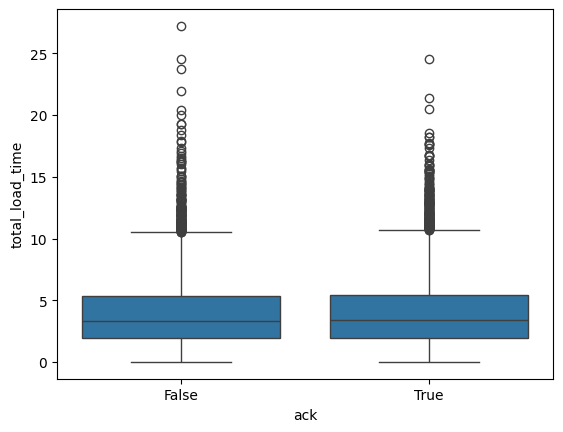

In [35]:
sns.boxplot(sessionDataByDate,x="ack", y="total_load_time")

In [36]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]



In [37]:
out = identify_outliers(sessionDataByDate["total_load_time"])
out


session_start
2018-10-01 05:21:22    12.27116
2018-10-03 06:33:39    14.15039
2018-10-29 21:46:48    12.21505
2018-10-31 16:08:12    15.41455
2018-11-02 11:11:46    11.65693
                         ...   
2023-08-30 07:01:55    12.60234
2023-09-06 20:40:06    17.36514
2023-09-08 17:47:34    10.80338
2023-09-10 04:33:58    12.59038
2023-09-20 14:09:01    11.19539
Name: total_load_time, Length: 340, dtype: float64

### Other problems
- session_duration has values that are negative which doesn't make sense

In [38]:
print(f"Negatives in session duration: {sessionDataByDate[sessionDataByDate['session_duration'] < 0].shape[0]}")

Negatives in session duration: 67


In [39]:
sessionDataByDate = sessionDataByDate.dropna()

## Basic descriptive statistics and Shapiro-Wilk test for Normal(Gaussian) Distribution

- H₀ : The data is normally distributed.
- H₁ : The data is not normally distributed

In [40]:
def normalityTest(shapiro):
    if shapiro.pvalue > 0.05:
        print(f"{shapiro.pvalue} > 0.05 >> Fail to Reject H0; data is normally distributed")
    else:
        print(f"{shapiro.pvalue} < 0.05 >> Reject H0; data is not normally distributed")

for column in sessionData.columns:
    if column != "session_start":
        print(column)
        normalityTest(scipy.stats.shapiro(sessionDataByDate[column]))
        print()

pct_click_product_info
0.9492663741111755 > 0.05 >> Fail to Reject H0; data is normally distributed

user_id
0.0 < 0.05 >> Reject H0; data is not normally distributed

screen_height
0.0 < 0.05 >> Reject H0; data is not normally distributed

pct_scroll_move_duration
6.220141449536632e-16 < 0.05 >> Reject H0; data is not normally distributed

scroll_move_total_rel_distance
0.0 < 0.05 >> Reject H0; data is not normally distributed

pct_click
8.148934728654862e-24 < 0.05 >> Reject H0; data is not normally distributed

pct_scrandom
0.9727791547775269 > 0.05 >> Fail to Reject H0; data is normally distributed

pct_wild_mouse
0.2037685513496399 > 0.05 >> Fail to Reject H0; data is normally distributed

session_id
0.0 < 0.05 >> Reject H0; data is not normally distributed

browser_name
0.0 < 0.05 >> Reject H0; data is not normally distributed

pct_input
0.0 < 0.05 >> Reject H0; data is not normally distributed

screen_width
0.0 < 0.05 >> Reject H0; data is not normally distributed

mouse_move_to

C:\Users\pc-Gábor\Documents\FIIT\zadanie\env\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [41]:
sessionDataByDate.describe()

,pct_click_product_info,user_id,screen_height,pct_scroll_move_duration,scroll_move_total_rel_distance,pct_click,pct_scrandom,pct_wild_mouse,session_id,browser_name,...,pct_mouse_click,wild_mouse_duration,pct_mouse_move,pct_doubleclick,pct_rage_click,page_activity_duration,total_load_time,pct_scroll_move,product_ean,session_duration
count,10942.000000,10942.000000,10942.000000,10942.000000,10942.000000,10942.000000,10942.000000,10942.000000,1.094200e+04,10942.00000,...,10942.000000,10942.000000,10942.000000,10942.000000,10942.000000,10942.000000,10942.000000,10942.000000,1.094200e+04,10942.000000
mean,50.479582,1235.923323,850.674465,15.238988,13.724725,12.607945,48.904302,47.732117,7.439823e+05,2.12612,...,13.540727,13.582686,13.535034,14.306814,54.485691,14.486432,4.028072,44.107529,5.006844e+12,150.133110
std,13.600456,718.389334,187.191831,1.347556,2.076300,2.098802,12.073777,13.437575,4.311727e+05,1.54735,...,1.000892,3.078217,0.996281,1.931472,12.487762,1.940531,2.843414,13.198739,2.888848e+12,59.374521
min,0.000000,0.000000,600.000000,9.657490,6.669420,4.673820,0.000000,0.000000,1.078000e+03,0.00000,...,9.792600,0.000000,9.338530,6.271650,0.000000,7.377110,0.008030,0.000000,1.119810e+09,-63.972190
25%,41.289160,619.250000,768.000000,14.395800,12.075905,11.105995,40.815890,38.694052,3.731112e+05,1.00000,...,12.863453,11.830440,12.863130,13.273688,45.998193,13.235173,1.937228,35.122413,2.476588e+12,109.746228
50%,50.518765,1228.500000,800.000000,15.245940,14.278485,12.406150,48.841170,47.827710,7.407390e+05,2.00000,...,13.544760,13.458125,13.548480,14.774340,54.552655,14.782540,3.390015,44.086660,4.990399e+12,149.539340
75%,59.648595,1854.000000,1080.000000,16.051970,15.372645,14.038450,56.922305,56.725167,1.112570e+06,3.00000,...,14.227035,15.820880,14.205445,15.648523,62.916835,15.864820,5.431825,52.948738,7.529846e+12,190.308802
max,100.000000,2499.000000,1080.000000,21.056660,18.692900,20.471820,100.000000,100.000000,1.499938e+06,6.00000,...,17.351800,22.915790,17.529780,19.716730,99.634470,22.295860,27.211750,100.000000,9.999900e+12,372.845880


### Correlations between pairs of attributes


KeyboardInterrupt



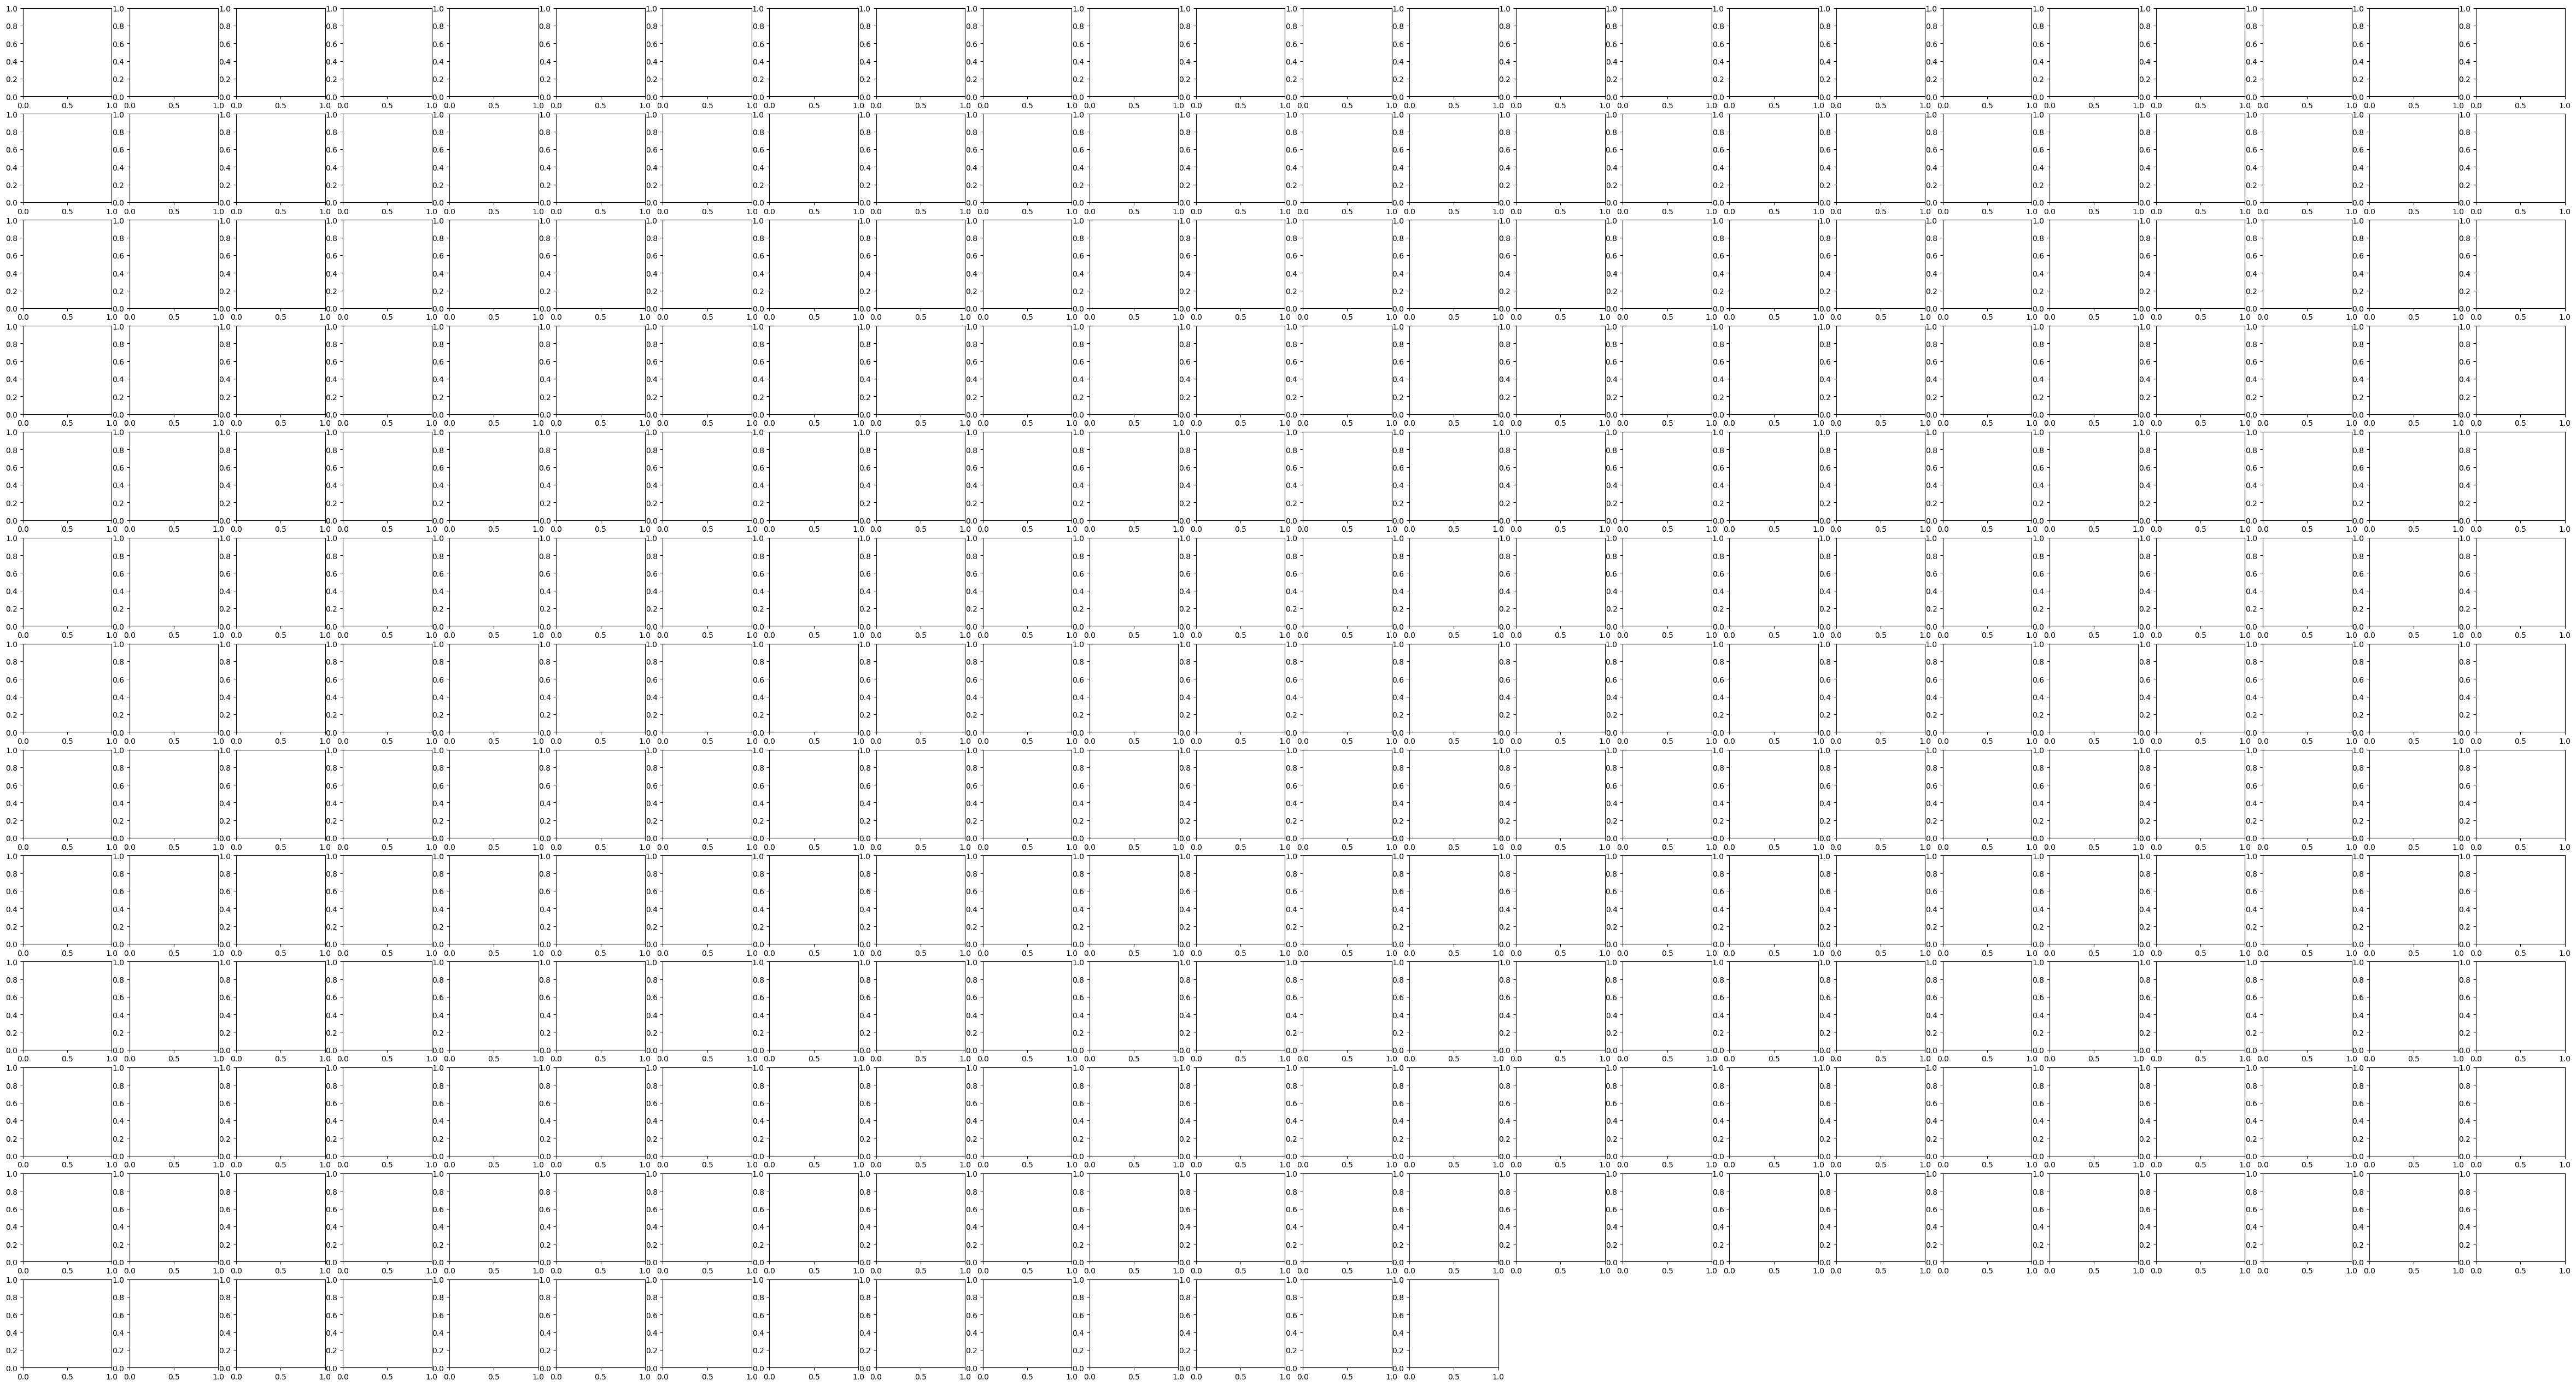

In [41]:
sns.pairplot(sessionDataByDate)

In [42]:
sessionDataByDate.corr()

,pct_click_product_info,user_id,screen_height,pct_scroll_move_duration,scroll_move_total_rel_distance,pct_click,pct_scrandom,pct_wild_mouse,session_id,browser_name,...,wild_mouse_duration,pct_mouse_move,pct_doubleclick,pct_rage_click,ack,page_activity_duration,total_load_time,pct_scroll_move,product_ean,session_duration
pct_click_product_info,1.000000,0.000113,0.005818,0.004880,0.001449,-0.004593,0.003911,0.005284,-0.007023,-0.005909,...,-0.015590,0.013663,-0.007182,0.009396,0.016199,0.023970,0.017195,-0.004576,-0.005853,0.007160
user_id,0.000113,1.000000,-0.016413,-0.008156,0.000723,0.014636,-0.003705,0.006242,-0.007738,-0.011196,...,0.003042,0.005419,0.008280,0.004696,-0.015251,-0.005916,0.003968,-0.010389,-0.004802,-0.006163
screen_height,0.005818,-0.016413,1.000000,-0.011459,0.019316,-0.019212,-0.000177,-0.001334,-0.010031,0.003066,...,0.009740,0.021010,-0.021633,-0.003920,0.018663,0.000457,0.020736,-0.011252,-0.002812,-0.001124
pct_scroll_move_duration,0.004880,-0.008156,-0.011459,1.000000,-0.144590,0.073545,0.011335,0.004812,0.004769,0.015707,...,-0.288849,0.009361,-0.066531,0.004324,-0.000901,-0.072363,-0.005410,0.005586,0.008481,-0.012844
scroll_move_total_rel_distance,0.001449,0.000723,0.019316,-0.144590,1.000000,-0.186441,-0.001448,0.004967,0.006977,-0.019226,...,0.276713,0.009498,-0.375749,-0.008159,0.748828,0.377174,0.000706,0.029827,-0.003569,0.002346
pct_click,-0.004593,0.014636,-0.019212,0.073545,-0.186441,1.000000,0.006725,-0.002171,-0.005024,0.004046,...,-0.601846,-0.029119,0.060263,-0.003044,-0.364489,0.018979,-0.010082,-0.016601,0.022735,-0.016892
pct_scrandom,0.003911,-0.003705,-0.000177,0.011335,-0.001448,0.006725,1.000000,0.005358,-0.004800,-0.005092,...,0.012712,-0.001636,0.010849,-0.004290,-0.005034,-0.020927,0.003629,0.002022,-0.005956,0.019770
pct_wild_mouse,0.005284,0.006242,-0.001334,0.004812,0.004967,-0.002171,0.005358,1.000000,-0.004171,-0.016605,...,0.003170,-0.005321,0.001393,-0.032972,0.005876,0.001754,0.001514,0.007328,0.003480,-0.006344
session_id,-0.007023,-0.007738,-0.010031,0.004769,0.006977,-0.005024,-0.004800,-0.004171,1.000000,0.001627,...,-0.000825,0.013123,-0.001313,0.011508,0.003298,0.010454,-0.018674,-0.011251,0.012772,-0.000653
browser_name,-0.005909,-0.011196,0.003066,0.015707,-0.019226,0.004046,-0.005092,-0.016605,0.001627,1.000000,...,-0.011239,-0.027610,0.000360,-0.007978,-0.013610,-0.008955,-0.017698,0.001799,0.008366,-0.000392


---
- We have found strong negative correlation between the duration of rapid mouse movement and user clicks
- The more the user moves the mouse rapidly the less they make clicks

<Axes: xlabel='wild_mouse_duration', ylabel='pct_click'>

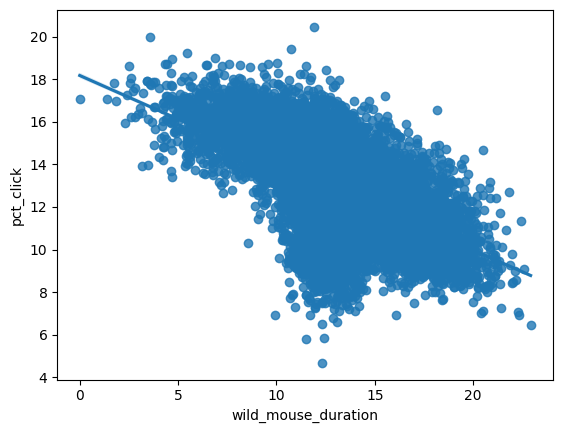

In [43]:
sns.regplot(data=sessionDataByDate.dropna(), x="wild_mouse_duration",y="pct_click") #-0.6

---
- We have found moderate positive correlation between the duration of rapid mouse movement and user doubleclicks
- The more the user moves the mouse rapidly the more doubleclicks they make

<Axes: xlabel='pct_doubleclick', ylabel='wild_mouse_duration'>

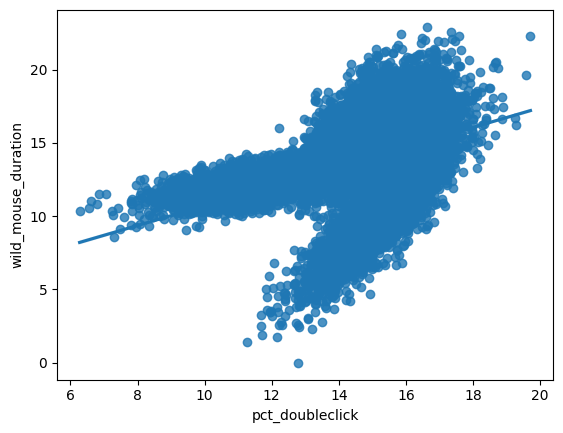

In [44]:
sns.regplot(data=sessionDataByDate.dropna(), x="pct_doubleclick",y="wild_mouse_duration") #0.41

---
- We have found weak negative correlation between the movement of the mouse (relative to the screen's size) and the amount of user clicks 
- The more the user moves the mouse the less clicks they make

<Axes: xlabel='mouse_move_total_rel_distance', ylabel='pct_click'>

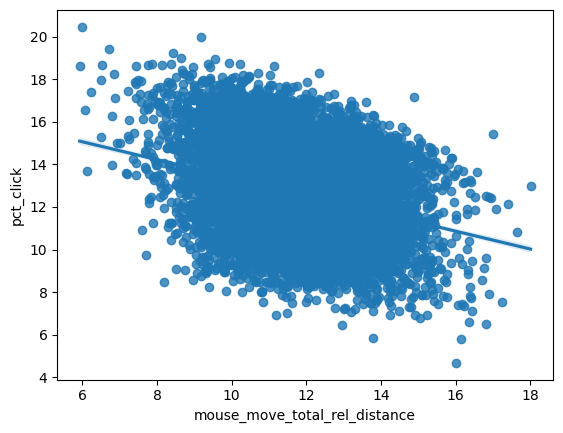

In [45]:
sns.regplot(data=sessionDataByDate.dropna(), x="mouse_move_total_rel_distance",y="pct_click") #-0.29

In [46]:
# sns.regplot(data=sessionDataByDate.dropna(), x="pct_scroll_move_duration",y="wild_mouse_duration") #-0.28
# sns.regplot(data=sessionDataByDate.dropna(), x="pct_scroll_move_duration",y="mouse_move_total_rel_distance") #0.22
# sns.regplot(data=sessionDataByDate.dropna(), x="wild_mouse_duration",y="pct_input") #0.28

### Correlation between attributes and the predicted variable (ack)

- We have found strong positive correlation between the scrolling (relative to the screen's size) and purchases made by users 
- The more the user scrolls the more likely they purchase something from the shop

<Axes: xlabel='scroll_move_total_rel_distance', ylabel='ack'>

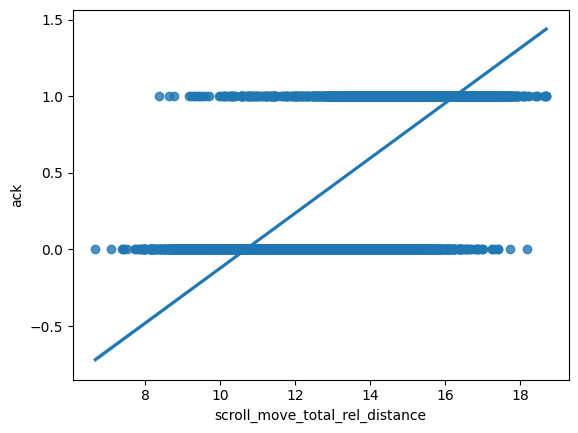

In [47]:
sns.regplot(data=sessionDataByDate.dropna(), x="scroll_move_total_rel_distance",y="ack") #0.74

---
- We have found moderate positive correlation between the time spent on the site and purchases made by users 
- The more time the user spends on the site the more likely they purchase something from the shop

<Axes: xlabel='page_activity_duration', ylabel='ack'>

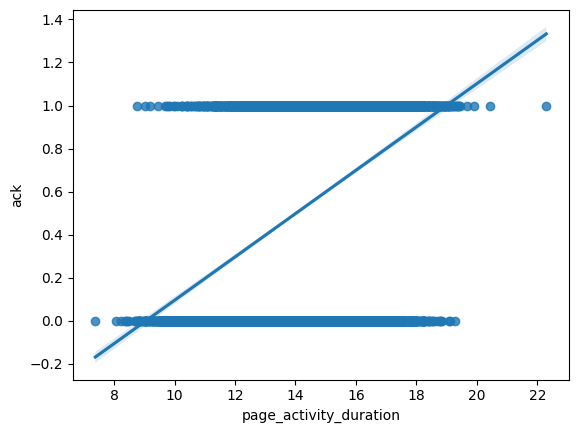

In [48]:
sns.regplot(data=sessionDataByDate.dropna(), x="page_activity_duration",y="ack") #0.39

### Attributes which influence the predicted variable (ack)
- amount of scrolling
- time spent on the site
- clicks made by the user

### Merging datasets
- Because user_id (user ; session) and product_ean (product ; session) are present across datasets we are able to combine them
- Merging these datasets is possible but not neccessary for now

# Hypothesis

### During the session, on average, scroll_move_total_rel_distance has a higher value when a purchase is made (ack=1) than when one isn't made (ack=0)

- We split the data to two groups.
- Group 1: people who purchased (ack=1)
- Group 2: people who did not purchase (ack=0)

In [49]:
purchased = sessionDataByDate.loc[sessionDataByDate.ack == 1, "scroll_move_total_rel_distance"]
not_purchased = sessionDataByDate.loc[sessionDataByDate.ack == 0, "scroll_move_total_rel_distance"]

- Removing outliers

In [50]:
purchased_out = identify_outliers(purchased)
not_purchased_out = identify_outliers(not_purchased)

In [51]:
purchased = purchased.drop(purchased_out.index)
not_purchased = not_purchased.drop(not_purchased_out.index)

- To verify normality, we use the Shapiro-Wilk test, which tests if the data comes from a normal distribution.
- If the p-value < 0.05, we reject the null hypothesis and the data probably come from a non-normal distribution.
- If the p-value > 0.05 then we fail to reject the null hypotesis, thus the data comes from a normal distribution.

In [52]:
np.random.seed(100)
data = np.random.choice(purchased, size=len(not_purchased))

In [53]:
stats.shapiro(data)

ShapiroResult(statistic=0.9983388185501099, pvalue=4.6930304961279035e-05)

In [54]:
stats.shapiro(not_purchased)

ShapiroResult(statistic=0.9959619641304016, pvalue=2.254351705310853e-10)

- Because the data comes from a non-normal distribution we need to use a non-parametric test.
- We will use Mann-Whitney U test
- If the p-value < 0.001 we reject the hypothesis and accept the alternative one.
- If the p-value > 0.001 we accept the null hypothesis.

In [55]:
stats.mannwhitneyu(data, not_purchased)

MannwhitneyuResult(statistic=23123016.5, pvalue=0.0)

### At this significance level, there is not enough evidence to say that people who make purchases scroll more on average
---

### During the session, on average, page_activity_duration has a higher value when a purchase is made (ack=1) than when one isn't made (ack=0)

- We split the data to two groups.
- Group 1: people who purchased (ack=1)
- Group 2: people who did not purchase (ack=0)

In [56]:
purchased = sessionDataByDate.loc[sessionDataByDate.ack == 1, "page_activity_duration"]
not_purchased = sessionDataByDate.loc[sessionDataByDate.ack == 0, "page_activity_duration"]

- Removing outliers

In [57]:
purchased_out = identify_outliers(purchased)

In [58]:
purchased = purchased.drop(purchased_out.index)

- To verify normality, we use the Shapiro-Wilk test, which tests if the data comes from a normal distribution.
- If the p-value < 0.05, we reject the null hypothesis and the data probably come from a non-normal distribution.
- If the p-value > 0.05 then we fail to reject the null hypotesis, thus the data comes from a normal distribution.

In [59]:
np.random.seed(100)
data = np.random.choice(purchased, size=len(not_purchased))

In [60]:
stats.shapiro(data)

ShapiroResult(statistic=0.998307466506958, pvalue=3.512743933242746e-05)

In [61]:
stats.shapiro(not_purchased)

ShapiroResult(statistic=0.9815049171447754, pvalue=6.031935178844498e-25)

- Because the data comes from a non-normal distribution we need to use a non-parametric test.
- We will use Mann-Whitney U test
- If the p-value < 0.001 we reject the hypothesis and accept the alternative one.
- If the p-value > 0.001 we accept the null hypothesis.

In [62]:
stats.mannwhitneyu(data,not_purchased)

MannwhitneyuResult(statistic=17549544.0, pvalue=5.5293485211522595e-298)

### At this significance level, there is not enough evidence to say that people who make purchases spend more time on the page on average

# Phase 2

### Percentage of work: 50%/50%

In [73]:
from sklearn.impute import SimpleImputer
#import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, PowerTransformer, Normalizer, MinMaxScaler
from sklearn.model_selection import train_test_split

## Data Cleaning

### Removing and replacing missing values (NaNs)

- After checking the data we see that we don't have any missing values in the session data, because we dropped them in the last phase

In [74]:
sessionDataByDate.isna().sum()

pct_click_product_info             10
user_id                             0
screen_height                       0
pct_scroll_move_duration            0
scroll_move_total_rel_distance     77
pct_click                          74
pct_scrandom                       13
pct_wild_mouse                     11
session_id                          0
browser_name                        0
pct_input                           0
screen_width                        0
mouse_move_total_rel_distance       0
pct_mouse_click                   166
wild_mouse_duration                 0
pct_mouse_move                    139
pct_doubleclick                     0
pct_rage_click                     13
ack                                 0
page_activity_duration             95
total_load_time                     0
pct_scroll_move                    12
product_ean                         0
session_duration                    3
dtype: int64

- and product data

In [75]:
productData.isna().sum()

location       0
product_ean    0
code           0
store_name     0
dtype: int64

- However in the user data we have a lot of missing values so we will replace them

In [76]:
userData.isna().sum()

sex                 1262
residence           1641
username               0
user_id                0
address              379
current_location     126
race                   0
name                   0
birthdate           1136
mail                   0
dtype: int64

In [77]:
userData.head()

,sex,residence,username,user_id,address,current_location,race,name,birthdate,mail
registration,,,,,,,,,,
2013-09-22,F,NaN,zmarek,1807,V Nížinách 6\r\n276 31 Sedlec-Prčice,"(Decimal('58.3427835'), Decimal('101.334050'))",unspecified,Irena Sedláčková,1931-09-14,dana76@chello.cz
2013-09-24,F,NaN,yamadaryohei,1074,京都府白井市太田ヶ谷34丁目2番5号,"(Decimal('-50.456706'), Decimal('-172.520074'))",unspecified,伊藤 結衣,1969-05-02,pkato@yahoo.com
2013-09-25,F,NaN,milenacerna,1294,Rokytnická 4\r\n169 35 Přelouč,"(Decimal('3.1728475'), Decimal('97.911387'))",unspecified,Denisa Vávrová,1914-09-09,nikola83@volny.cz
2013-09-26,M,NaN,ruzickatomas,1686,NaN,"(Decimal('48.0218595'), Decimal('-68.727505'))",unspecified,Patrik Malý,1962-01-31,jindrich05@email.cz
2013-09-30,F,長野県葛飾区中小来川24丁目8番6号 コート北上野572,taichi54,964,東京都横浜市金沢区松石21丁目18番7号,"(Decimal('-15.5416345'), Decimal('123.791853'))",unspecified,前田 真綾,NaT,sayuri12@hotmail.com


- We replace the values in the sex column with 1s and 0s (1 = Male; 0 = Female) randomly, while taking into consideration their frequency

In [78]:
a = userData
s = a.sex.value_counts(normalize=True)
a['sex_fillna'] = a['sex']
a.loc[a.sex.isna(), 'sex_fillna'] = np.random.choice(s.index, p=s.values, size=a.sex.isna().sum())
a.sex = a.sex_fillna

In [79]:
le = LabelEncoder()
userData.sex = le.fit_transform(userData.sex)
new = userData
userData = userData.drop('sex_fillna', axis=1)

In [80]:
userData.head()

,sex,residence,username,user_id,address,current_location,race,name,birthdate,mail
registration,,,,,,,,,,
2013-09-22,0,NaN,zmarek,1807,V Nížinách 6\r\n276 31 Sedlec-Prčice,"(Decimal('58.3427835'), Decimal('101.334050'))",unspecified,Irena Sedláčková,1931-09-14,dana76@chello.cz
2013-09-24,0,NaN,yamadaryohei,1074,京都府白井市太田ヶ谷34丁目2番5号,"(Decimal('-50.456706'), Decimal('-172.520074'))",unspecified,伊藤 結衣,1969-05-02,pkato@yahoo.com
2013-09-25,0,NaN,milenacerna,1294,Rokytnická 4\r\n169 35 Přelouč,"(Decimal('3.1728475'), Decimal('97.911387'))",unspecified,Denisa Vávrová,1914-09-09,nikola83@volny.cz
2013-09-26,1,NaN,ruzickatomas,1686,NaN,"(Decimal('48.0218595'), Decimal('-68.727505'))",unspecified,Patrik Malý,1962-01-31,jindrich05@email.cz
2013-09-30,0,長野県葛飾区中小来川24丁目8番6号 コート北上野572,taichi54,964,東京都横浜市金沢区松石21丁目18番7号,"(Decimal('-15.5416345'), Decimal('123.791853'))",unspecified,前田 真綾,NaT,sayuri12@hotmail.com


In [81]:
userData.isna().sum()

sex                    0
residence           1641
username               0
user_id                0
address              379
current_location     126
race                   0
name                   0
birthdate           1136
mail                   0
dtype: int64

In [82]:
userData = userData.dropna(subset=['address', 'current_location'])

- Removing residence column beacause it has lot of NaNs na it is not important

In [83]:
userData = userData.drop('residence', axis=1)

- We convert the birthdates to datetime category

In [84]:
userData["birthdate"] = pd.to_datetime(userData["birthdate"], errors="coerce")

- Calculate a mean from the birthdates and replace missing values with the mean

In [85]:
mean_birthdate = userData["birthdate"].mean()
mean_birthdate

Timestamp('1964-11-30 01:51:55.807860256')

In [86]:
userData.fillna(mean_birthdate, inplace=True)

- Remove the time part of the datetime. The exact time of birth is not important

In [87]:
userData["birthdate"] = pd.to_datetime(userData["birthdate"], errors="coerce").dt.date

- No missing values remaining

In [88]:
userData.isna().sum()

sex                 0
username            0
user_id             0
address             0
current_location    0
race                0
name                0
birthdate           0
mail                0
dtype: int64

### Removing and replacing outliers

In [89]:
def remove_outliers(a):
    outliers = identify_outliers(a)
    a = a.drop(outliers.index)
    return a
def replace_outliers(a):
    a = a.clip(lower=a.quantile(0.05), upper=a.quantile(0.95))
    return a
    

In [90]:
for column in sessionDataByDate.columns:
    if column != "ack":
        series = identify_outliers(sessionDataByDate[column])
        print(f"{column}: {len(series)}")

pct_click_product_info: 0
user_id: 0
screen_height: 0
pct_scroll_move_duration: 0
scroll_move_total_rel_distance: 0
pct_click: 0
pct_scrandom: 0
pct_wild_mouse: 0
session_id: 0
browser_name: 0
pct_input: 1751
screen_width: 0
mouse_move_total_rel_distance: 0
pct_mouse_click: 0
wild_mouse_duration: 0
pct_mouse_move: 0
pct_doubleclick: 0
pct_rage_click: 0
page_activity_duration: 0
total_load_time: 0
pct_scroll_move: 0
product_ean: 0
session_duration: 0


In [91]:
to_remove = []
to_replace = []
for column in sessionDataByDate.columns:
    if column != "ack":
        series = identify_outliers(sessionDataByDate[column])
        if len(series) < 100 and len(series) > 0:
            to_remove.append(column)
        else:
            to_replace.append(column)

In [92]:
for column in to_remove:
    sessionDataByDate[column] = sessionDataByDate[column].drop_duplicates()
    sessionDataByDate[column] = remove_outliers(sessionDataByDate[column])

In [93]:
for column in to_replace:
    sessionDataByDate[column] = replace_outliers(sessionDataByDate[column])

In [94]:
for column in sessionDataByDate.columns:
    if column != "ack":
        series = identify_outliers(sessionDataByDate[column])
        print(f"{column}: {len(series)}")

pct_click_product_info: 0
user_id: 0
screen_height: 0
pct_scroll_move_duration: 0
scroll_move_total_rel_distance: 0
pct_click: 0
pct_scrandom: 0
pct_wild_mouse: 0
session_id: 0
browser_name: 0
pct_input: 1751
screen_width: 0
mouse_move_total_rel_distance: 0
pct_mouse_click: 0
wild_mouse_duration: 0
pct_mouse_move: 0
pct_doubleclick: 0
pct_rage_click: 0
page_activity_duration: 0
total_load_time: 0
pct_scroll_move: 0
product_ean: 0
session_duration: 0


## Data Pre-processing

### Splitting the dataset to training part

In [95]:
#dataset = sessionDataByDate.loc[:, sessionDataByDate.columns!='ack']
#y = sessionDataByDate.loc[:, sessionDataByDate.columns=='ack']

training, test = train_test_split(sessionDataByDate,train_size=0.7, test_size=0.3,  random_state=42)

In [96]:
training = training.dropna()

### Creating Pipeline

- Pre-processing is repeatable for the test set because of the pipeline

- We used the power tranformer to get a more gaussian-like distribution of the data
- We used MinMaxScaler and Normalizer to get a more dense data and normalize them between 0 and 1
- This can improve the performance of the model and reduces the impact of outliers

In [97]:
pipeline = make_pipeline(PowerTransformer(), Normalizer(), MinMaxScaler())
aX = training.loc[:,training.columns!="ack"]
ay = training.loc[:,training.columns=="ack"]
pipeline.fit(aX)

Pipeline(steps=[('powertransformer', PowerTransformer()),
                ('normalizer', Normalizer()),
                ('minmaxscaler', MinMaxScaler())])

In [98]:
test = test.dropna()

## EDA again

In [99]:
df = pd.DataFrame(pipeline.transform(aX),columns = aX.columns)

In [100]:
df = df.drop_duplicates()

In [101]:
df.head()

,pct_click_product_info,user_id,screen_height,pct_scroll_move_duration,scroll_move_total_rel_distance,pct_click,pct_scrandom,pct_wild_mouse,session_id,browser_name,...,pct_mouse_click,wild_mouse_duration,pct_mouse_move,pct_doubleclick,pct_rage_click,page_activity_duration,total_load_time,pct_scroll_move,product_ean,session_duration
0,0.499745,0.829306,0.216392,0.397069,0.283451,0.751329,0.704512,0.671383,0.585508,0.211878,...,0.149438,0.383141,0.729768,0.633489,0.650622,0.387727,0.352965,0.847910,0.423013,0.229444
1,0.609754,0.861299,0.770822,0.290932,0.769181,0.374122,0.143129,0.626700,0.420198,0.579625,...,0.316343,0.414751,0.894883,0.133650,0.855110,0.428191,0.672611,0.412593,0.535839,0.383168
2,0.563391,0.418747,0.395669,0.577899,0.698251,0.512430,0.031409,0.192308,0.629548,0.758648,...,0.888482,0.541593,0.487460,0.543546,0.391549,0.691663,0.335302,0.571250,0.918342,0.554269
3,0.102463,0.149097,0.146817,0.314831,0.222014,0.684830,0.632792,0.465344,0.264850,0.581964,...,0.531569,0.301969,0.581235,0.753830,0.507828,0.639061,0.598340,0.422601,0.221398,0.450210
4,0.211195,0.507802,0.186035,0.372172,0.422533,0.864789,0.365239,0.633012,0.640782,0.813453,...,0.336212,0.131188,0.451712,0.446305,0.395431,0.573607,0.133063,0.342203,0.710512,0.204444


In [102]:
for column in df.columns:
    print(len(identify_outliers(df[column])))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [103]:
df.describe()

,pct_click_product_info,user_id,screen_height,pct_scroll_move_duration,scroll_move_total_rel_distance,pct_click,pct_scrandom,pct_wild_mouse,session_id,browser_name,...,pct_mouse_click,wild_mouse_duration,pct_mouse_move,pct_doubleclick,pct_rage_click,page_activity_duration,total_load_time,pct_scroll_move,product_ean,session_duration
count,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,...,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000
mean,0.520435,0.565998,0.530117,0.462812,0.515652,0.489205,0.503430,0.526659,0.546528,0.553097,...,0.489412,0.531465,0.521494,0.515711,0.518603,0.495292,0.491324,0.517193,0.533342,0.482211
std,0.200344,0.208089,0.253272,0.191559,0.219166,0.211194,0.189673,0.183662,0.203805,0.199963,...,0.211865,0.228095,0.201797,0.212586,0.186002,0.199522,0.201636,0.202153,0.203542,0.195428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370864,0.398525,0.396691,0.322407,0.310818,0.326913,0.361243,0.392591,0.377636,0.413806,...,0.331495,0.374335,0.366860,0.354596,0.376130,0.343791,0.335483,0.365831,0.364049,0.336852
50%,0.523947,0.583565,0.470309,0.462936,0.549271,0.483543,0.506238,0.530612,0.565152,0.578118,...,0.490683,0.510232,0.524012,0.539565,0.521215,0.508651,0.491535,0.519706,0.551555,0.486549
75%,0.674503,0.749398,0.793278,0.596942,0.702825,0.657635,0.644135,0.663977,0.723970,0.703813,...,0.650859,0.726585,0.674779,0.676772,0.660453,0.644759,0.648895,0.671047,0.712529,0.630759
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
sessionDataByDate.corr()

,pct_click_product_info,user_id,screen_height,pct_scroll_move_duration,scroll_move_total_rel_distance,pct_click,pct_scrandom,pct_wild_mouse,session_id,browser_name,...,wild_mouse_duration,pct_mouse_move,pct_doubleclick,pct_rage_click,ack,page_activity_duration,total_load_time,pct_scroll_move,product_ean,session_duration
pct_click_product_info,1.000000,-0.000043,0.007423,0.005957,0.003459,-0.000639,0.001684,0.007410,-0.006431,-0.006173,...,-0.016174,0.009717,-0.010208,0.011446,0.015125,0.022474,0.023312,-0.005340,-0.003121,0.008534
user_id,-0.000043,1.000000,-0.016362,-0.011872,0.001574,0.016995,-0.004156,0.008660,-0.007592,-0.009701,...,0.000635,0.004350,0.006893,0.005620,-0.014723,-0.004054,0.004794,-0.013257,-0.004673,-0.007285
screen_height,0.007423,-0.016362,1.000000,-0.010626,0.019812,-0.018445,0.000660,-0.002311,-0.010685,0.004266,...,0.006723,0.021467,-0.023430,-0.002732,0.018663,-0.002637,0.018828,-0.013190,-0.003048,0.000007
pct_scroll_move_duration,0.005957,-0.011872,-0.010626,1.000000,-0.140781,0.078260,0.011511,0.006320,0.007576,0.014193,...,-0.276656,0.009309,-0.059912,0.002781,-0.003921,-0.068032,-0.009116,0.004761,0.007833,-0.015313
scroll_move_total_rel_distance,0.003459,0.001574,0.019812,-0.140781,1.000000,-0.197737,-0.003353,0.000643,0.008065,-0.017914,...,0.242679,0.012268,-0.398358,-0.007794,0.763123,0.383365,0.002240,0.025488,-0.005599,-0.001422
pct_click,-0.000639,0.016995,-0.018445,0.078260,-0.197737,1.000000,0.009613,0.000191,-0.003037,0.005496,...,-0.600370,-0.029442,0.049676,-0.003515,-0.364979,0.043461,-0.011520,-0.018773,0.022134,-0.015785
pct_scrandom,0.001684,-0.004156,0.000660,0.011511,-0.003353,0.009613,1.000000,0.004678,-0.005576,-0.006151,...,0.012244,-0.002370,0.009705,-0.007086,-0.006582,-0.019586,0.006452,0.002131,-0.007785,0.020359
pct_wild_mouse,0.007410,0.008660,-0.002311,0.006320,0.000643,0.000191,0.004678,1.000000,-0.003417,-0.016488,...,0.001350,-0.007072,-0.000743,-0.033850,0.003630,0.000558,0.001879,0.012865,0.003132,-0.007734
session_id,-0.006431,-0.007592,-0.010685,0.007576,0.008065,-0.003037,-0.005576,-0.003417,1.000000,0.000759,...,-0.001290,0.012884,-0.000954,0.012064,0.003585,0.011844,-0.016369,-0.010592,0.013008,-0.002720
browser_name,-0.006173,-0.009701,0.004266,0.014193,-0.017914,0.005496,-0.006151,-0.016488,0.000759,1.000000,...,-0.012754,-0.024608,0.001862,-0.008529,-0.013065,-0.007921,-0.018704,0.003430,0.011185,0.000772


In [105]:
sns.regplot(data=df, x="scroll_move_total_rel_distance",y="ack")

KeyError: 'ack'

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import mutual_info_regression

def findInDF(col, df):
    for i,c in zip(df.T.values,df.columns):
        if i[0] == col[0]:
            return c 

- We chose f_regression because it helps assess the statistical significance of the relationship between each individual feature and the target variable.
- We chose mutual_info_regression because it is capable of capturing non-linear relationships between features and the target variable.

In [ ]:
#X, y = pipeline.transform(training), pipeline.transform(training).T[18]
features = SelectKBest(mutual_info_regression, k=4).fit_transform(aX, ay)

for i in features.T:
    print(findInDF(i,df))
    print(i)

 - f_reg for 1 feature

In [106]:
X, y = pipeline.transform(training), pipeline.transform(training).T[18]
features = SelectKBest(f_regression, k=1).fit_transform(X, y)

for i in features.T:
    print(findInDF(i,df))
    print(i)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ack


 - f_reg for 2 features

In [ ]:
X, y = pipeline.transform(training), pipeline.transform(training).T[18]
features = SelectKBest(f_regression, k=2).fit_transform(X, y)
for i in features.T:
    print(findInDF(i,df))
    print(i)

 - f_reg for 3 features

In [98]:
X, y = pipeline.transform(training), pipeline.transform(training).T[18]
features = SelectKBest(f_regression, k=3).fit_transform(X, y)

for i in features.T:
    print(findInDF(i,df))
    print(i)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ack


 - f_reg for 4 features

In [99]:
X, y = pipeline.transform(training), pipeline.transform(training).T[18]
features = SelectKBest(f_regression, k=4).fit_transform(X, y)

for i in features.T:
    print(findInDF(i,df))
    print(i)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ack


# Using Pipline on testing data

In [107]:
bX = test.loc[:,test.columns!="ack"]
by = test.loc[:,test.columns=="ack"]
pipeline.transform(bX)

array([[0.17201731, 0.51519566, 0.74880288, ..., 0.79217354, 0.64916104,
        0.52146466],
       [0.57992634, 0.60049008, 0.15331528, ..., 0.57304175, 0.13437383,
        0.58020748],
       [0.78388629, 0.34158135, 0.47679164, ..., 0.15730349, 0.73637299,
        0.34408084],
       ...,
       [0.86724519, 0.82653499, 0.43240464, ..., 0.40683128, 0.40878124,
        0.46918001],
       [0.29873608, 0.46459383, 0.47099491, ..., 0.34405785, 0.22957263,
        0.6607483 ],
       [0.46186903, 0.86490392, 0.1839518 , ..., 0.40559438, 0.30373718,
        0.11431364]])

# Phase 3

In [160]:
import warnings
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)


### Implementation of OneR

In [109]:
def oneR(data, y):
    # Initialize the best feature and error rate
    best_feature = None
    best_error_rate = float('inf')
    data["ack"] = y.values
    columns = [column for column in data.columns if column != "ack"]

    # Iterate over each feature
    for feature in columns:
        # Compute the error rate for the current feature
        error_rate = 0
        for value in data[feature].unique():
            # Compute the majority class for the current feature value
            majority_class = data[data[feature] == value]['ack'].mode()[0]

            # Compute the number of misclassifications for the current feature value
            misclassifications = len(data[(data[feature] == value) & ('ack' != majority_class)])

            # Update the error rate
            error_rate += misclassifications

        # Update the best feature and error rate
        if error_rate < best_error_rate:
            best_feature = feature
            best_error_rate = error_rate

    # Return the best feature
    return best_feature

In [143]:
oneR(aX, ay)

'pct_click_product_info'

## Training and evalutation of machine learning classifiers

### Random forest

- Training Random forest with training data (aX=training features, ay=training labels)

In [110]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(aX, ay.values)

C:\Users\pc-Gábor\Documents\FIIT\zadanie\env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

- Testing on testing data (bX=testing features)

In [111]:
forest_pred = forest_clf.predict(bX)

- Calculating metrics by comparing labels with predicted values

In [112]:
print(f"Random Forest Accuracy: {accuracy_score(by, forest_pred)}")
print(f"Random Forest Precision: {precision_score(by, forest_pred)}")
print(f"Random Forest Recall: {recall_score(by, forest_pred)}")

Random Forest Accuracy: 0.9476236663433559
Random Forest Precision: 0.9529411764705882
Random Forest Recall: 0.9518213866039953


In [113]:
print(classification_report(by,forest_pred))

              precision    recall  f1-score   support

       False       0.94      0.94      0.94      1391
        True       0.95      0.95      0.95      1702

    accuracy                           0.95      3093
   macro avg       0.95      0.95      0.95      3093
weighted avg       0.95      0.95      0.95      3093



### Confusion Matrix

Text(0.5, 23.52222222222222, 'true')

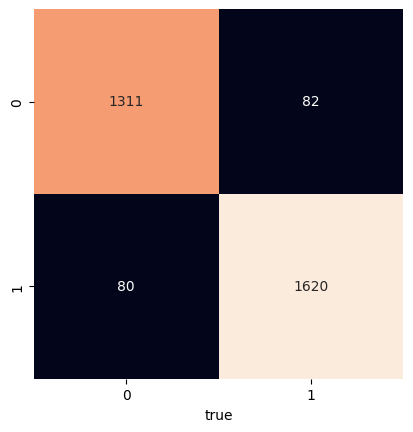

In [114]:
mat = confusion_matrix(by, forest_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False)
plt.xlabel("true")

### Decision tree

- Training Decision tree with training data (aX=training features, ay=training labels)

In [115]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(aX, ay)

DecisionTreeClassifier(random_state=42)

- Testing on testing data (bX=testing features)

In [116]:
tree_pred = tree_clf.predict(bX)

- Calculating metrics by comparing labels with predicted values

In [117]:
print(f"Decision Tree Accuracy: {accuracy_score(by, tree_pred)}")
print(f"Decision Tree Precision: {precision_score(by, tree_pred)}")
print(f"Decision Tree Recall: {recall_score(by, tree_pred)}")

Decision Tree Accuracy: 0.9004203039120595
Decision Tree Precision: 0.9104829210836278
Decision Tree Recall: 0.9083431257344301


In [118]:
print(classification_report(by,tree_pred))

              precision    recall  f1-score   support

       False       0.89      0.89      0.89      1391
        True       0.91      0.91      0.91      1702

    accuracy                           0.90      3093
   macro avg       0.90      0.90      0.90      3093
weighted avg       0.90      0.90      0.90      3093



### Confusion Matrix

Text(0.5, 23.52222222222222, 'true')

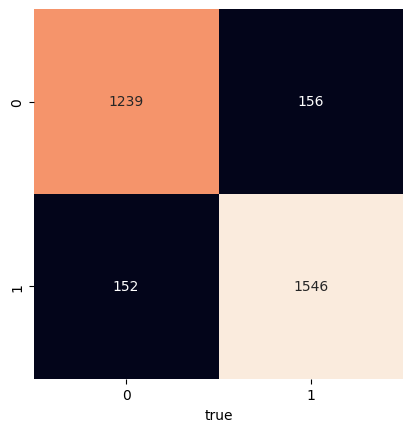

In [119]:
mat = confusion_matrix(by, tree_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False)
plt.xlabel("true")

### Plot Tree - Visualisation

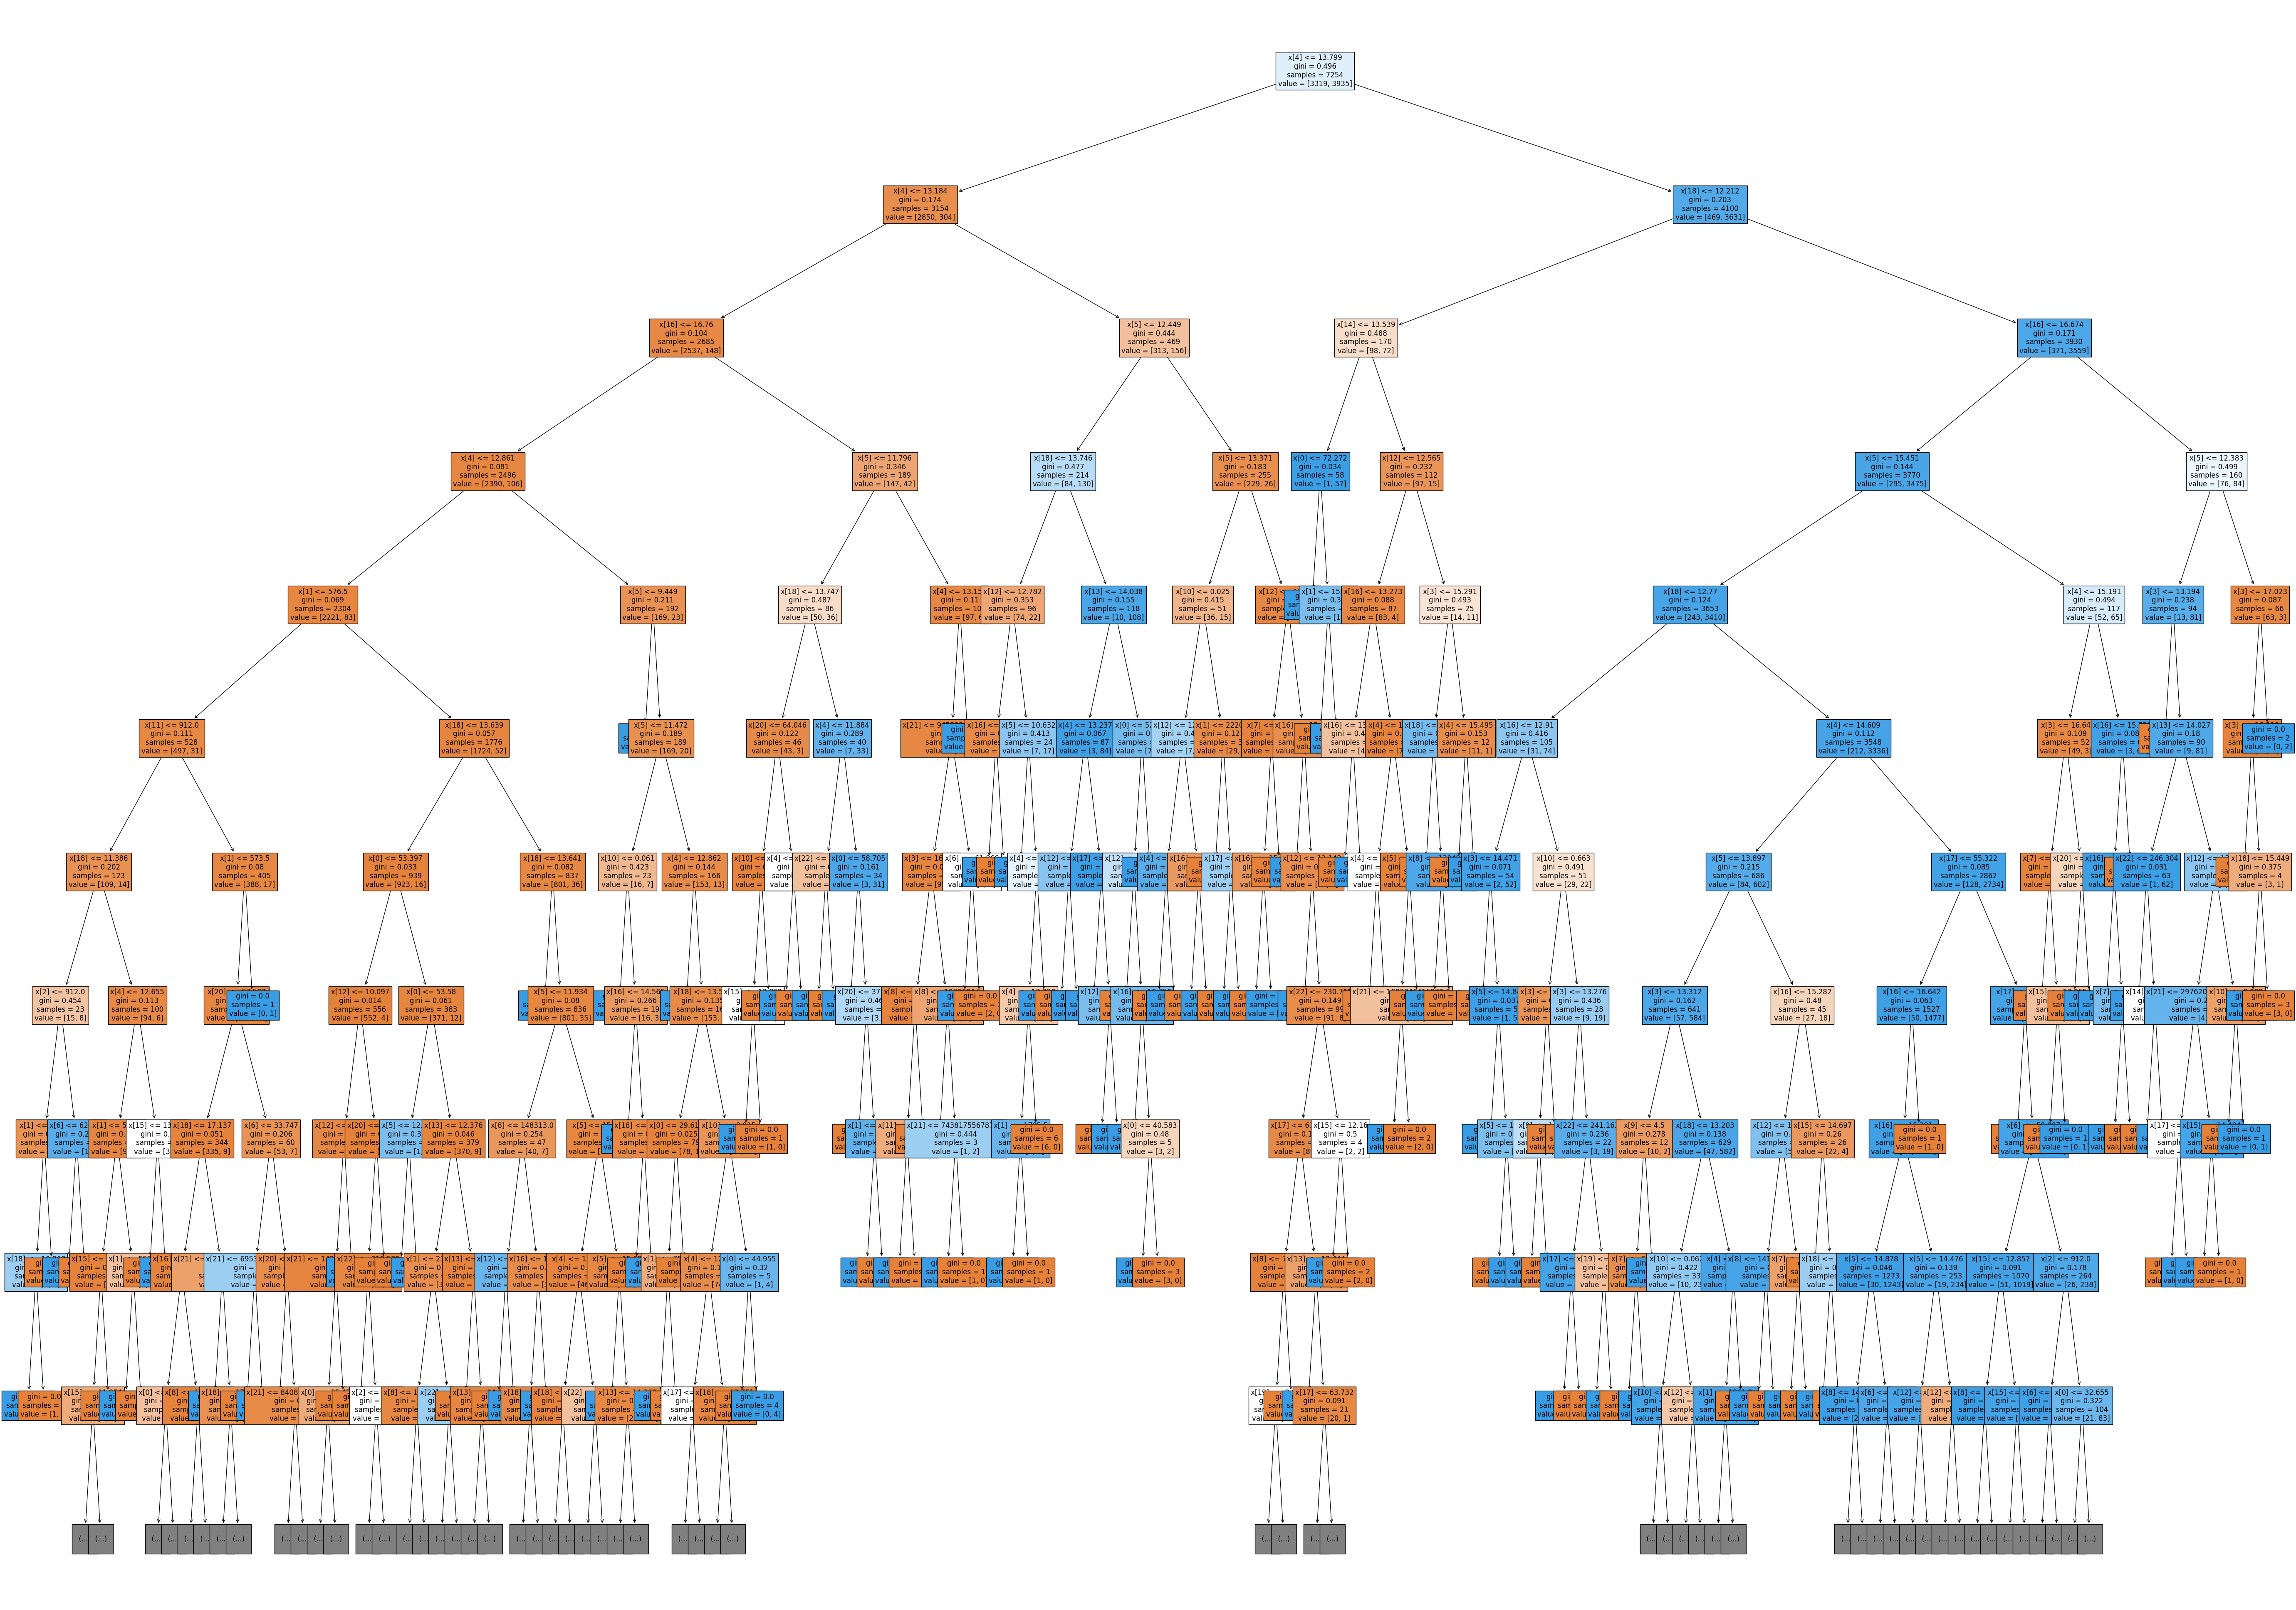

In [120]:
plt.figure(figsize=(70,50))
plot_tree(tree_clf, filled=True, fontsize=12, max_depth=10)
plt.show()

### KNN (comparing with 1 different algorithm)

- Training KNN with training data (aX=training features, ay=training labels)

In [121]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(aX, ay.values)

C:\Users\pc-Gábor\Documents\FIIT\zadanie\env\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

- Testing on testing data (bX=testing features)

In [122]:
knn_pred = knn_clf.predict(bX)

- Calculating metrics by comparing labels with predicted values

In [123]:
print(f"KNN Accuracy: {accuracy_score(by, knn_pred)}")
print(f"KNN Precision: {precision_score(by, knn_pred)}")
print(f"KNN Recall: {recall_score(by, knn_pred)}")

KNN Accuracy: 0.5056579372777239
KNN Precision: 0.5477636664826063
KNN Recall: 0.5828437132784959


- Compared to the Random forest this KNN is not very good

### Hyperparameter tuning

In [128]:
max_depth = list()
for tree in forest_clf.estimators_:
    max_depth.append(tree.tree_.max_depth)
print("The maximum depth of the trees in the Random Forest Classifier is: ", max(max_depth))

The maximum depth of the trees in the Random Forest Classifier is:  28


In [129]:
len(forest_clf.estimators_)

100

In [125]:
p = {"criterion": ("gini", "entropy"), "max_features": ["sqrt", "log2"], "max_depth": [7,8,9,10]}
optimisation = GridSearchCV(forest_clf, p, cv=5, scoring="accuracy")
result = optimisation.fit(aX,ay.values)

C:\Users\pc-Gábor\Documents\FIIT\zadanie\env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\pc-Gábor\Documents\FIIT\zadanie\env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\pc-Gábor\Documents\FIIT\zadanie\env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\pc-Gábor\Documents\FIIT\zadanie\env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed

In [124]:
score = pd.DataFrame(optimisation.cv_results_)
score.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.175738,0.276382,0.023727,0.015270,gini,7,sqrt,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",0.934528,0.940041,0.933150,0.935906,0.946207,0.937966,0.004722,13
1,2.101054,0.289638,0.017945,0.003148,gini,7,log2,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",0.934528,0.940041,0.933150,0.935906,0.946207,0.937966,0.004722,13
2,2.248545,0.017145,0.018836,0.004052,gini,8,sqrt,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.931771,0.942109,0.936595,0.937285,0.951034,0.939759,0.006521,11
3,2.141645,0.048871,0.017739,0.001699,gini,8,log2,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.931771,0.942109,0.936595,0.937285,0.951034,0.939759,0.006521,11
4,2.311168,0.085493,0.017846,0.001104,gini,9,sqrt,"{'criterion': 'gini', 'max_depth': 9, 'max_fea...",0.931771,0.945555,0.940041,0.940041,0.953103,0.942102,0.007045,7
5,2.349084,0.130220,0.018488,0.000734,gini,9,log2,"{'criterion': 'gini', 'max_depth': 9, 'max_fea...",0.931771,0.945555,0.940041,0.940041,0.953103,0.942102,0.007045,7
6,2.407380,0.091025,0.019120,0.001075,gini,10,sqrt,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.933839,0.943487,0.942109,0.939352,0.955172,0.942792,0.007017,3
7,2.329630,0.020845,0.017677,0.000397,gini,10,log2,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.933839,0.943487,0.942109,0.939352,0.955172,0.942792,0.007017,3
8,2.121785,0.011900,0.015357,0.000841,entropy,7,sqrt,"{'criterion': 'entropy', 'max_depth': 7, 'max_...",0.930393,0.937285,0.935217,0.936595,0.947586,0.937415,0.005626,15
9,2.115245,0.010542,0.015188,0.000407,entropy,7,log2,"{'criterion': 'entropy', 'max_depth': 7, 'max_...",0.930393,0.937285,0.935217,0.936595,0.947586,0.937415,0.005626,15


In [130]:
optimisation.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=42)

In [131]:
best_est = optimisation.best_estimator_
best_est = best_est.fit(aX, ay.values)
predicted = best_est.predict(bX)

C:\Users\pc-Gábor\Documents\FIIT\zadanie\env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [132]:
print(f"Accuracy: {accuracy_score(by, predicted)}")
print(f"Precision: {precision_score(by, predicted)}")
print(f"Recall: {recall_score(by, predicted)}")

Accuracy: 0.9453604914322664
Precision: 0.9500880798590722
Recall: 0.9506462984723855


In [133]:
print(classification_report(by,predicted))

              precision    recall  f1-score   support

       False       0.94      0.94      0.94      1391
        True       0.95      0.95      0.95      1702

    accuracy                           0.95      3093
   macro avg       0.94      0.94      0.94      3093
weighted avg       0.95      0.95      0.95      3093



### OVERFITTING !!!

In [153]:
scores = cross_val_score(best_est, aX, ay, cv=5)
scores

C:\Users\pc-Gábor\Documents\FIIT\zadanie\env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\pc-Gábor\Documents\FIIT\zadanie\env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\pc-Gábor\Documents\FIIT\zadanie\env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\pc-Gábor\Documents\FIIT\zadanie\env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed

array([0.93659545, 0.94624397, 0.93797381, 0.94279807, 0.95448276])

In [157]:
print(scores.mean())
print(scores.var(ddof=1))

0.943618812234131
5.1696008578392406e-05


In [144]:
p1 = {"criterion": ["gini"],"n_estimators": [50,75,100] ,"max_features": ["sqrt", "log2"], "max_depth": [10,20,28]}
optimisation1 = GridSearchCV(forest_clf, p1, cv=5, scoring="roc_auc")
result1 = optimisation1.fit(aX,ay.values)

C:\Users\pc-Gábor\Documents\FIIT\zadanie\env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\pc-Gábor\Documents\FIIT\zadanie\env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\pc-Gábor\Documents\FIIT\zadanie\env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\pc-Gábor\Documents\FIIT\zadanie\env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed

In [145]:
score1 = pd.DataFrame(optimisation1.cv_results_)
score1.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.453503,0.066993,0.020189,0.002136,gini,10,sqrt,50,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.955328,0.963027,0.962520,0.951449,0.965102,0.959485,0.005199,17
1,3.819786,0.207777,0.025781,0.001471,gini,10,sqrt,75,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.956369,0.963115,0.962512,0.953271,0.966060,0.960266,0.004708,7
2,4.719494,0.124218,0.038776,0.015604,gini,10,sqrt,100,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.955742,0.962610,0.963482,0.953055,0.965323,0.960042,0.004767,11
3,2.391529,0.025432,0.018788,0.001325,gini,10,log2,50,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.955328,0.963027,0.962520,0.951449,0.965102,0.959485,0.005199,17
4,3.928726,0.440543,0.029982,0.005688,gini,10,log2,75,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.956369,0.963115,0.962512,0.953271,0.966060,0.960266,0.004708,7
5,4.813840,0.367434,0.033978,0.006352,gini,10,log2,100,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.955742,0.962610,0.963482,0.953055,0.965323,0.960042,0.004767,11
6,2.732576,0.126547,0.018389,0.001357,gini,20,sqrt,50,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.956448,0.962231,0.958916,0.954372,0.967818,0.959957,0.004723,15
7,4.226511,0.243081,0.026984,0.002279,gini,20,sqrt,75,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.957753,0.960795,0.960488,0.954966,0.967742,0.960349,0.004257,5
8,5.406962,0.174452,0.030980,0.000632,gini,20,sqrt,100,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.956387,0.959419,0.962348,0.955254,0.966795,0.960041,0.004186,13
9,2.784838,0.018766,0.018789,0.001165,gini,20,log2,50,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.956448,0.962231,0.958916,0.954372,0.967818,0.959957,0.004723,15


In [148]:
optimisation1.best_estimator_

RandomForestClassifier(max_depth=28, n_estimators=50, random_state=42)

In [149]:
best_est1 = optimisation1.best_estimator_
best_est1 = best_est1.fit(aX, ay.values)
predicted1 = best_est1.predict(bX)

C:\Users\pc-Gábor\Documents\FIIT\zadanie\env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [150]:
print(f"Accuracy: {accuracy_score(by, predicted1)}")
print(f"Precision: {precision_score(by, predicted1)}")
print(f"Recall: {recall_score(by, predicted1)}")

Accuracy: 0.9485935984481086
Precision: 0.9535567313345091
Recall: 0.9529964747356052


In [161]:
scores1 = cross_val_score(best_est1, aX, ay, cv=5)
scores1

array([0.93797381, 0.94831151, 0.94279807, 0.94210889, 0.95448276])

In [162]:
print(scores1.mean())
print(scores1.var(ddof=1))

0.9451350079612159
4.084300193762301e-05


### Evaluation of the impact of the selected solution strategy on the classification